In [1]:
%matplotlib qt
from djexpcode.schemas import *
from djexpcode import *
import djexpcode
pngsavepath = os.path.abspath(pjoin(os.path.dirname(os.path.dirname(djexpcode.__file__)),'figures/figure1'))
if not os.path.isdir(pngsavepath):
    os.mkdir(pngsavepath)
    print(pngsavepath)

pdfsavepath = os.path.abspath(pjoin(pngsavepath,'pdf'))
if not os.path.isdir(pdfsavepath):
    os.mkdir(pdfsavepath)
    print(pdfsavepath)
# For exporting notebook to bitbucket
# % matplotlib inline


Connecting root@localhost:3306


In [188]:
# identify "closedloop" experiments 
from djexpcode.schemas import *
from djexpcode import *

nn,ss,area,enu = (TwoPhotonVolume()*TreadmillPositionExperiment()).fetch('session_name',
                                                                         'session_subname',
                                                                         'recording_area',
                                                                         'enucleated')
keys = []
for n,s,a,e in zip(nn,ss,area,enu):
    if 'closedLoop' in s:
        if not 'BlackLaps' in s:
            if e:
                e = 'enucleated'
            else:
                e = ''
            keys.append(dict(session_name=n,session_subname=s,area = a,enucleated = e))
print('Closed loop experiments:')
for k in keys:
    print('\t {area} \t {session_name} - {session_subname}  \t {enucleated}'.format(**k))

Closed loop experiments:
	 S1 	 171201_EV038_2P_S1_JC - run00_closedLoopActuator  	 enucleated
	 S1 	 171201_EV038_2P_S1_JC - run01_closedLoopActuator  	 enucleated
	 V1 	 171201_EV038_2P_V1_JC - run00_closedLoopActuator  	 enucleated
	 V1 	 180208_JC060_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180208_JC060_2P_JC - run01_closedLoopActuator  	 
	 S1 	 181008_JC079_2P_JC - run00_closedLoopActuator  	 
	 S1 	 190126_JC092_2P_S1_JC - run00_closedLoopActuator  	 
	 Str 	 190126_JC092_2P_Str_JC - run02_closedLoopActuator  	 
	 V1a 	 190126_JC092_2P_V1a_JC - run04_closedLoopActuator  	 
	 S1 	 190201_JC093_2P_S1_JC - run00_closedLoopActuator  	 
	 V1 	 190201_JC093_2P_V1_JC - run02_closedLoopActuator  	 
	 V1 	 180830_KS501_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run01_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run04_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run05_closedLoopActuator  	 
	 V1 

### Summary for all closedLoopActuator experiments
#### Function to produce the figures is below.

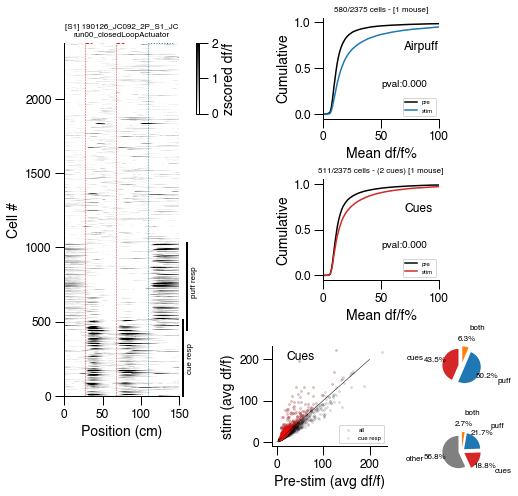

In [11]:
import pandas as pd
force = True
for k in keys:
    np.warnings.filterwarnings('ignore')
    fnames = pjoin(pngsavepath,
                   'fig1_2_closed_loop_actuator_{session_name}_{session_subname}.png'.format(**k))
    if os.path.isfile(fnames) and not force:
        continue
    df = pd.DataFrame((StimulusAirPuff.Triggered()*StimulusAirPuff()
                       *TwoPhotonVolume()*
                       PositionMaps.ActivityMaps()*
                       PositionMapsStats.ActivityMapStats()*
                       TreadmillPositionExperiment()*TreadmillBelt()
                       & dict(session_name = k['session_name'],
                             session_subname = k['session_subname'])).fetch())
    plot_summary_closedloopactuator(df)
    plt.savefig(fnames);
    fnames = pjoin(pdfsavepath,'fig1_2_closed_loop_actuator_{session_name}_{session_subname}.pdf'.format(**k))
    plt.savefig(fnames); 
    plt.savefig(fnames.replace('.pdf','.svg')); 

### Overview of all cells

* Pie charts
* Cumulatives of responsive cells

In [189]:
import pandas as pd
variables = ['recording_area','mouse_id',
             'session_name','session_subname',
             'is_puff_responsive','is_cue_responsive',
             'puff_amplitudes','cue_amplitudes',
             'puff_amplitudes_pre','cue_amplitudes_pre',
             'enucleated'] 
dfs = []
for k in keys:
    np.warnings.filterwarnings('ignore')
    df = pd.DataFrame.from_records(zip(*(StimulusAirPuff.Triggered()*StimulusAirPuff()
                       *TwoPhotonVolume()*
                       PositionMaps.ActivityMaps()*
                       PositionMapsStats.ActivityMapStats()*
                       TreadmillPositionExperiment()*TreadmillBelt()
                       & dict(session_name = k['session_name'],
                             session_subname = k['session_subname'])).fetch(*variables)),
                                 columns = variables)
    dfs.append(df)
df = pd.concat(dfs)
animalsessions = df[df.recording_area == 'S1'][['mouse_id','session_name','session_subname']].drop_duplicates()
ndf = []
for dd in range(len(animalsessions)):
    dd = animalsessions.iloc[dd]
    ndf.append(df[(df.session_name == dd.session_name) & (df.session_subname == dd.session_subname)])
ndf = pd.concat(ndf)

4 5 (10661, 11)
Ks_2sampResult(statistic=0.32769830949284784, pvalue=8.516144252203076e-73)
Ks_2sampResult(statistic=0.4656652360515021, pvalue=1.9406635889635005e-221)


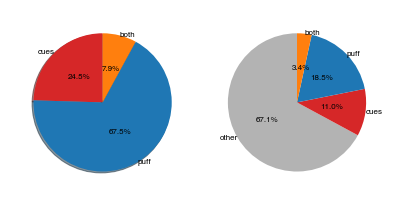

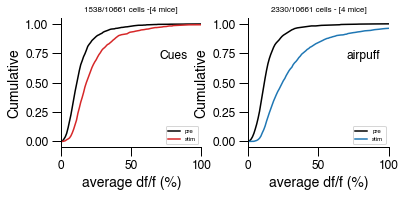

In [193]:

# Number of cells responding to each condition
fig = plt.figure()
fig.add_axes([.1,.1,0.4,0.8])
ncellsboth = np.sum((df.is_cue_responsive == 1) & (ndf.is_puff_responsive == 1))
ncellspuff = np.sum((df.is_cue_responsive == 0) & (ndf.is_puff_responsive == 1))
ncellscues = np.sum((df.is_cue_responsive == 1) & (ndf.is_puff_responsive == 0))
plt.pie([ncellscues,ncellspuff,ncellsboth], explode=(0.0, 0.0, 0.0), 
        labels=['cues','puff','both'], colors=colors[1:], 
        autopct='%2.1f%%',pctdistance=.5,labeldistance=1.,
        shadow=True, startangle=90,textprops=dict(fontsize=8))
fig.add_axes([.55,.1,0.4,0.8])
ncellsboth = np.sum((ndf.is_cue_responsive == 1) & (ndf.is_puff_responsive == 1))
ncellspuff = np.sum((ndf.is_cue_responsive == 0) & (ndf.is_puff_responsive == 1))
ncellscues = np.sum((ndf.is_cue_responsive == 1) & (ndf.is_puff_responsive == 0))
ncellsother = np.sum((ndf.is_cue_responsive == 0) & (ndf.is_puff_responsive == 0))
plt.pie([ncellsother,ncellscues,ncellspuff,ncellsboth], 
        explode=(0.0,0.0, 0.0, 0.0), 
        labels=['other','cues','puff','both'], 
        colors=[[0.7,0.7,0.7]]+colors[1:], 
        autopct='%2.1f%%',pctdistance=.5,labeldistance=1.,
        shadow=False, startangle=90,textprops=dict(fontsize=8));
fname = pjoin(pdfsavepath,'fig1_2_closed_loop_actuator_S1_piecharts.pdf')
plt.savefig(fname);
plt.savefig(fname.replace('.pdf','.svg'));
print(len(animalsessions['mouse_id'].drop_duplicates()),len(animalsessions),np.shape(ndf))

# Cue and puff histograms
animalsessions = df[df.recording_area == 'S1'][['mouse_id','session_name','session_subname']].drop_duplicates()
ndf = []
for dd in range(len(animalsessions)):
    dd = animalsessions.iloc[dd]
    ndf.append(df[(df.session_name == dd.session_name) & (df.session_subname == dd.session_subname)])
ndf = pd.concat(ndf)
# Cells responding to each condition get the amplitudes stim and pre
sel = ndf[['cue_amplitudes','cue_amplitudes_pre',
           'puff_amplitudes','puff_amplitudes_pre']].copy()
sel['cue_avg'] = 0
sel['cue_avg_pre'] = 0
sel['puff_avg'] = 0
sel['puff_avg_pre'] = 0
for s in range(len(sel)):
    sel.cue_avg.iloc[s] = sel.cue_amplitudes.iloc[s].mean()
    sel.cue_avg_pre.iloc[s] = sel.cue_amplitudes_pre.iloc[s].mean()
    sel.puff_avg.iloc[s] = sel.puff_amplitudes.iloc[s].mean()
    sel.puff_avg_pre.iloc[s] = sel.puff_amplitudes_pre.iloc[s].mean()
    
from scipy.stats import ks_2samp    
# Figure
fig = plt.figure(figsize = [6.5,3])
fig.add_axes([.2,.2,0.3,0.6])
edges = np.arange(0,500)
idx = (ndf.is_cue_responsive > 0)
plotCumulative(np.array(sel[idx].cue_avg_pre).flatten(),edges,
               color = colors[0],label = 'pre')
plotCumulative(np.array(sel[idx].cue_avg).flatten(),edges,
               color = colors[1],
               label = 'stim')
plt.xlim([0,100])
plt.legend(fontsize = 6)
plt.xlabel('average df/f (%)')
plt.ylabel('Cumulative')
plt.title('{0}/{1} cells -[{2} mice]'.format(
    np.sum(idx),len(idx),len(np.unique(ndf.mouse_id))),
         fontsize = 8)
plt.text(70,0.7,'Cues',fontsize = 12)
print(ks_2samp(np.array(sel[idx].cue_avg_pre).flatten(),
               np.array(sel[idx].cue_avg).flatten()))

fig.add_axes([.6,.2,0.3,0.6])

idx = (ndf.is_puff_responsive > 0)
plotCumulative(np.array(sel[idx].puff_avg_pre).flatten(),edges,
               color = colors[0],label = 'pre')
plotCumulative(np.array(sel[idx].puff_avg).flatten(),edges,
               color = colors[2],
               label = 'stim')
plt.xlim([0,100])
plt.legend(fontsize = 6)
plt.xlabel('average df/f (%)')
plt.ylabel('Cumulative')
plt.title('{0}/{1} cells - [{2} mice]'.format(
    np.sum(idx),len(idx),len(np.unique(ndf.mouse_id))),
         fontsize = 8)
plt.text(70,0.7,'airpuff',fontsize = 12)
print(ks_2samp(np.array(sel[idx].puff_avg_pre).flatten(),
               np.array(sel[idx].puff_avg).flatten()))
fname = pjoin(pdfsavepath,'fig1_2_closed_loop_actuator_S1_cumulatives.pdf')
plt.savefig(fname);
plt.savefig(fname.replace('.pdf','.svg'));
fname = pjoin(pngsavepath,'fig1_2_closed_loop_actuator_S1_cumulatives.png')
plt.savefig(fname);

<IPython.core.display.Javascript object>


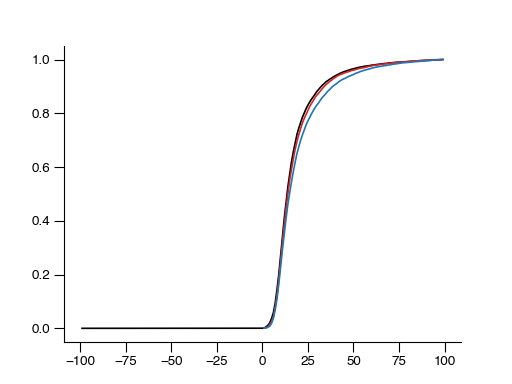

<IPython.core.display.Javascript object>


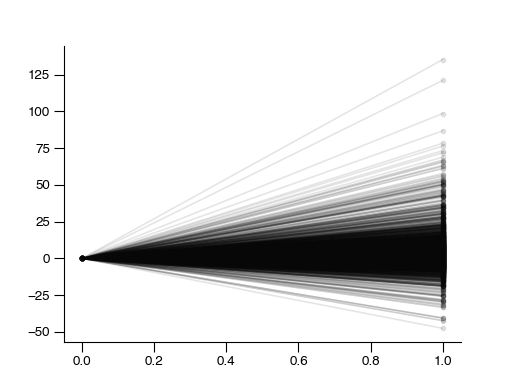

In [49]:
plt.figure()
plotCumulative(sel.cue_avg_pre,np.arange(-100,100,1))
plotCumulative(sel.cue_avg,np.arange(0,100,1))
plotCumulative(sel.puff_avg,np.arange(0,100,1))
x = np.vstack([sel.cue_avg_pre-sel.cue_avg_pre,sel.cue_avg-sel.cue_avg_pre])
y = np.zeros_like(x)
plt.figure()

y[1,:] = 1
plt.plot(y,x,'ko-',alpha=0.1);


In [6]:
from scipy.stats import ks_2samp
def plot_summary_closedloopactuator(df):
    fig = plt.figure(figsize = [8,7])
    # Scatter of cue mean amplitudes
    fig.add_axes([.56,.1,.2,.2])

    spre = np.stack(df.cue_amplitudes_pre).mean(axis = 2)
    sstim = np.stack(df.cue_amplitudes).mean(axis = 2)
    plt.plot(spre.flatten(),sstim.flatten(),'k.',alpha = 0.1,label='all')
    plt.plot(spre[df.is_cue_responsive == 1,:].flatten(),
             sstim[df.is_cue_responsive == 1 ,:].flatten(),'r.',alpha = 0.1,label='cue resp')
    plt.plot([0,200],[0,200],'k',lw=0.5)
    plt.xlabel('Pre-stim (avg df/f)')
    plt.ylabel('stim (avg df/f)')
    plt.text(20,200,'Cues',fontsize = 12)
    plt.legend(fontsize = 6)

    # Histograms of cue amplitudes
    fig.add_axes([.65,.43,0.2,0.2])
    edges = np.arange(0,500)
    spre = np.stack(df.cue_amplitudes_pre)
    sstim = np.stack(df.cue_amplitudes)
    idx = np.array(df.is_cue_responsive == 1)
    if np.sum(idx):
        plotCumulative(spre[idx,:].flatten(),edges,color = colors[0],label = 'pre')
        plotCumulative(sstim[idx,:].flatten(),edges,color = colors[1],label = 'stim')
        pval = ks_2samp(spre[idx,:].flatten(),sstim[idx,:].flatten())
        plt.text(50,0.3,'pval:{0:1.3f}'.format(pval.pvalue))
        plt.xlim([0,100])
        plt.legend(fontsize = 6)
        plt.xlabel('Mean df/f%')
        plt.ylabel('Cumulative')
        plt.text(70,0.7,'Cues',fontsize = 12)
    plt.title('{0}/{1} cells - ({3} cues) [{2} mouse]'.format(
        np.sum(idx),len(idx),len(np.unique(df.mouse_id)),spre.shape[1]),
              fontsize = 8)
        
    # Histograms of airpuff amplitudes
    fig.add_axes([.65,.75,0.2,0.2])
    spre = np.stack(df.puff_amplitudes_pre)
    sstim = np.stack(df.puff_amplitudes)
    idx = np.array(df.is_puff_responsive == 1) 
    if np.sum(idx):
        plotCumulative(spre[idx].flatten(),edges,color = colors[0],label = 'pre')
        plotCumulative(sstim[idx].flatten(),edges,color = colors[2],label = 'stim')
        pval = ks_2samp(spre[idx].flatten(),sstim[idx].flatten())
        plt.text(50,0.3,'pval:{0:1.3f}'.format(pval.pvalue))
        plt.xlim([0,100])
        plt.legend(fontsize = 6)
        plt.xlabel('Mean df/f%')
        plt.ylabel('Cumulative')
        plt.text(70,0.7,'Airpuff',fontsize = 12)
    plt.title('{0}/{1} cells - [{2} mouse]'.format(
        np.sum(idx),len(idx),len(np.unique(df.mouse_id))),
         fontsize = 8)


    # Number of cells responding to each condition
    fig.add_axes([.85,.22,0.08,0.08])
    ncellsboth = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 1))
    ncellspuff = np.sum((df.is_cue_responsive == 0) & (df.is_puff_responsive == 1))
    ncellscues = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 0))
    plt.pie([ncellscues,ncellspuff,ncellsboth], 
            explode=(0.2, 0.2, 0.2), 
            labels=['cues','puff','both'], colors=colors[1:], 
            autopct='%2.1f%%',pctdistance=1.5,labeldistance=2.2,
            shadow=False, startangle=90,textprops=dict(fontsize=8))
    fig.add_axes([.85,.05,0.08,0.08])
    ncellsboth = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 1))
    ncellspuff = np.sum((df.is_cue_responsive == 0) & (df.is_puff_responsive == 1))
    ncellscues = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 0))
    ncellsother = np.sum((df.is_cue_responsive == 0) & (df.is_puff_responsive == 0))
    plt.pie([ncellsother,ncellscues,ncellspuff,ncellsboth], 
            explode=(0.2,0.2, 0.2, 0.2), 
            labels=['other','cues','puff','both'], 
            colors=[[0.5,0.5,0.5]]+colors[1:], 
            autopct='%2.1f%%',pctdistance=1.5,labeldistance=2.2,
            shadow=False, startangle=90,textprops=dict(fontsize=8))

    # The response position maps
    spre_std = np.stack(df.cue_amplitudes_pre).std(axis = 2).mean(axis = 1)
    spre = np.stack(df.cue_amplitudes_pre).mean(axis = 2).mean(axis = 1)
    sstim = np.stack(df.cue_amplitudes).mean(axis = 2).mean(axis = 1)

    zscoredrespall = np.stack(((df.mean_position_df_f.T - spre)/spre_std).T)
    isrespflag = 1
    idx0 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 0))[0]
    idx1 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 1))[0]
    zscoredresp = zscoredrespall[np.hstack([idx0,idx1])]
    startpuff = len(idx0)

    isrespflag = 0
    idx0 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 0))[0]
    idx1 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 1))[0]
    npuffonly = len(idx1)
    zscoredrespnot = zscoredrespall[np.hstack([idx1,idx0])]

    fig.add_axes([.2,.2,.25,.7])

    plt.imshow(np.vstack([zscoredresp,zscoredrespnot]),
               clim = [0,2],cmap = 'gray_r',aspect = 'auto',origin = 'bottom',
              interpolation = 'none')
    plt.plot([155,155],[0,len(zscoredresp)],color = 'k',lw = 2,clip_on = False)
    plt.plot([160,160],[startpuff,len(zscoredresp)+npuffonly],color = 'k',lw = 2,clip_on = False)
    plt.text(160,len(zscoredresp)/2,'cue resp',
             fontsize = 8,
             rotation = 90,va = 'center',ha = 'left')
    plt.text(165,len(zscoredresp)+(npuffonly)/2,'puff resp',
             fontsize = 8,
             rotation = 90,va = 'center',ha = 'left')
    plt.xlim([0,150])
    plt.xlabel('Position (cm)')
    plt.ylabel('Cell #')
    plt.colorbar(shrink=0.2,label = 'zscored df/f',
                 anchor = (.5,1),panchor = False)
    
    plt.vlines(df.belt_cues.iloc[0][:,0].flatten(),0,
               len(df),color = colors[1],linestyle = '--',lw = 0.5)
    for c in df.belt_cues.iloc[0]:
        plt.plot(c,np.array([0,0])+len(df),'--',lw = 1,
                 color = colors[1],clip_on = False)
    # The puffs in space
    key = dict(session_name = df.session_name.iloc[0],
           session_subname = df.session_subname.iloc[0])
    timestamps = np.vstack([df.stim_onsets.iloc[0],
                             df.stim_offsets.iloc[0]]).T
    Xd = lap_map_from_timestamps(timestamps,key)
    xd = np.sum(Xd>1,axis = 0).squeeze()
    idx = np.where(xd ==0)[0]
    idx = np.hstack([idx,len(xd)])
    puffinspace = [idx[idx<np.where(xd>xd.max()*.75)[0][0]][-1],
                   idx[idx>np.where(xd>xd.max()*.75)[0][0]][0]]
    
    plt.vlines(puffinspace[0],0,
               len(df),color = colors[2],linestyle = '--',lw = 0.5)
    plt.plot(puffinspace,np.array([0,0])+len(df),':',lw = 1,
                 color = colors[2],clip_on = False)
    plt.ylim([0,len(df)])
    plt.title('[{2}] {0}\n{1}'.format(df.session_name.iloc[0],
                                           df.session_subname.iloc[0],
                                           df.recording_area.iloc[0]),
             fontsize = 8)


### Figure for examples from 190126_JC092_2P_S1_JC

In [185]:
#PositionMaps()*PositionMapsStats()*TwoPhotonVolume() & 'recording_area = "S1"'
import pandas as pd
keys = [dict(session_name = '190126_JC092_2P_S1_JC',session_subname = 'run00_closedLoopActuator')]
dfs = []
for k in keys:
    df = pd.DataFrame((StimulusAirPuff.Triggered()*StimulusAirPuff()
                       *TwoPhotonVolume()*
                       PositionMaps.ActivityMaps()*
                       PositionMapsStats.ActivityMapStats()*
                       TreadmillPositionExperiment()*TreadmillBelt()
                       & k).fetch())
    dfs.append(df)
df = pd.concat(dfs)
%matplotlib inline

/home/joao/lib/datajoint-python/datajoint/connection.py:150: UserWarning: Mysql server has gone away. Reconnectting to the server.
  warnings.warn("Mysql server has gone away. Reconnectting to the server.")


<IPython.core.display.Javascript object>


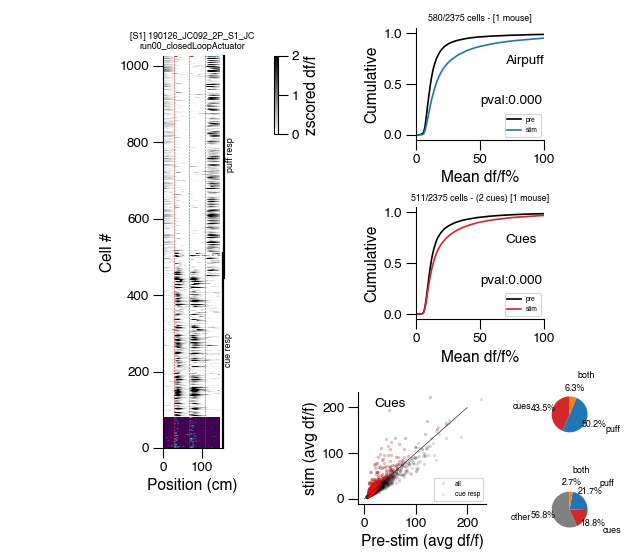

In [51]:
plot_summary_closedloopactuator_only_responsive(df)
fnames = pjoin(pdfsavepath,'fig1_closed_loop_actuator_EXAMPLE_{session_name}_{session_subname}.pdf'.format(**k))
plt.savefig(fnames); 
plt.savefig(fnames.replace('.pdf','.svg'));

In [5]:
import pandas as pd
keys = [dict(session_name = '190126_JC092_2P_S1_JC',session_subname = 'run00_closedLoopActuator')]
dfs = []
for k in keys:
    df = pd.DataFrame((StimulusAirPuff.Triggered()*StimulusAirPuff()
                       *PositionMaps()
                       *TwoPhotonVolume()*
                       Segmentation.Traces()*
                       PositionMaps.ActivityMaps()*
                       PositionMapsStats.ActivityMapStats()*
                       TreadmillPositionExperiment()*TreadmillBelt()
                       & k).fetch())
    dfs.append(df)
df = pd.concat(dfs)

In [3]:
# Select 2 cells responsive to the cues and 2 responsive to the airpuff

plt.figure()
cue_delta = df.cue_amplitudes.map(lambda x: np.nanmean(x)) - df.cue_amplitudes_pre.map(lambda x: np.nanmean(x))
idx  = np.where( (df.is_puff_responsive == 1))
nbPlayStack(np.stack(df.deconv_map.iloc[idx]),cmap = 'gray_r',vmax = 3)


{'fig': <Figure size 640x480 with 1 Axes>,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f69d78afda0>,
 'im': <matplotlib.image.AxesImage at 0x7f69cb63ca20>}

In [112]:
df.iloc[0]

mouse_id                                                                           JC092
session_date                                                                  2019-01-26
session_name                                                       190126_JC092_2P_S1_JC
run_num                                                                                0
session_subname                                                 run00_closedLoopActuator
plane                                                                                  0
channel                                                                                0
roi                                                                                    0
belt_id                                                                            t02f1
puff_df_f                              [[12.1792953375, 11.0860951488, 25.7012400633,...
puff_deconv                            [[0.0, 0.0, 9.03346593018938, 0.0, 0.0, 0.0, 0...
is_puff              

In [184]:
cellidx = [530,60,500,856,5]
frametimes = (TwoPhotonPlane() & keys[0]).fetch('frametimes')[0]
behav = pd.DataFrame((Behavior() & keys[0]).fetch())

puffon = df.stim_onsets.iloc[0]
puffoff = df.stim_offsets.iloc[0]

plt.close()
fig = plt.figure(1,figsize=[7,5])
import matplotlib.gridspec as gridspec
spec2 = gridspec.GridSpec(ncols=5, nrows=5, figure=fig)
fig.add_subplot(spec2[:3, :3])
start,end = [50,200]
tidx = (frametimes>start) & (frametimes<end)

for icell,cell in enumerate(cellidx):
    trace = lowpass(np.array(df.df_f.iloc[cell])[tidx],0.9)
    maxtrace = np.max(trace)*1.2
    scale = 50
    plt.plot(frametimes[tidx],trace/maxtrace+ 1.*icell,'k',lw = 0.8)
    plt.plot(np.array([0,0])+start -2,np.array([0,scale])/maxtrace + 1.*icell,'k')
btime = behav.behaviortime.iloc[0]
btidx = (btime>start) & (btime<end)
vel = lowpass(np.array(behav.behaviorvelocity.iloc[0])[btidx],0.1)*150
maxvel = np.max(vel)/.5
plt.plot(btime[btidx], + vel/maxvel + icell +1,'k',lw = .8)
# Plot puff onsets
for on,off in zip(puffon,puffoff):
    if (on>start) & (on <end):
        plt.plot([on,off],np.array([0,0])-0.1,color = colors[2])
        plt.vlines(on,0,icell+1,color = colors[2],lw = 0.5)
        
# Plot cue onsets
beltcues = (TreadmillBelt()*TreadmillPositionExperiment() & k).fetch('belt_cues')[0]
pos = np.array(behav.behaviorposition.iloc[0])*150
btime = np.array(behav.behaviortime.iloc[0])
cues = np.zeros_like(pos)
laptimes = np.array(behav.laptimes.iloc[0])
for lo,lf in np.vstack([laptimes[:-1],laptimes[1:]]).T:
    idx1 = np.where((btime>= lo) & (btime < lf))[0]
    for c1,c2 in beltcues:
        p = pos[idx1]
        cues[idx1[(p>=c1) & (p<=c2)]] = 1
cueon = btime[np.where(np.diff(cues)>0)[0]]
cueoff = btime[np.where(np.diff(cues)<0)[0]]


for on,off in np.vstack([cueon,cueoff]).T:
    if (on>start) & (on <end):
        plt.plot([on,off],np.array([0,0])-0.1,color = colors[1])
        plt.vlines(on,0,icell+1,color = colors[1],lw = 0.5)
plt.plot(np.array([40,70])+start,[-.2,-.2])
plt.axis('off')

for icell,cell in enumerate(cellidx):
    fig.add_subplot(spec2[icell,4:])
    plt.imshow(df.deconv_map.iloc[cell],vmin = 0,vmax = 1,
               cmap = 'gray_r',aspect = 'auto',origin='bottom')
    plt.axis('off')
    plt.box(True)
fig.add_subplot(spec2[3:, :2])
mv = df.velocity_map.iloc[0].mean(axis = 0)
sv = df.velocity_map.iloc[0].std(axis = 0)/np.sqrt(len(df.velocity_map.iloc[0]))
tv = df.lapspace.iloc[0][:-1]
plt.plot(df.lapspace.iloc[0][:-1],df.velocity_map.iloc[0].T,alpha = 0.1,color='k')
plt.plot(tv,mv,alpha = 1,color='r')
#plt.fill_between(tv,mv-sv,mv+sv)
plt.plot([130,150],[0,0],'k',lw = 1,clip_on=False)
plt.plot([150,150],[0,10],'k',lw = 1,clip_on=False)
plt.ylim([0,60])
plt.axis('off')

fig.add_subplot(spec2[3:, 2:4])
plt.imshow(df.velocity_map.iloc[0][0:],aspect = 'auto',
           origin = 'bottom',
           cmap = 'viridis',
           interpolation='none',
          clim = [0,40])
plt.colorbar(shrink = 0.6
             ,label = 'velocity')
fig.tight_layout()
fnames = pjoin(pdfsavepath,'fig1_closed_loop_actuator_EXAMPLE_CELLS_{session_name}_{session_subname}.pdf'.format(**k))
plt.savefig(fnames); 
plt.savefig(fnames.replace('.pdf','.svg'));

In [150]:
len(df.velocity_map.iloc[0])

81

In [4]:
from scipy.stats import ks_2samp
def plot_summary_closedloopactuator_only_responsive(df):
    fig = plt.figure(figsize = [8,7])
    # Scatter of cue mean amplitudes
    fig.add_axes([.56,.1,.2,.2])

    spre = np.stack(df.cue_amplitudes_pre).mean(axis = 2)
    sstim = np.stack(df.cue_amplitudes).mean(axis = 2)
    plt.plot(spre.flatten(),sstim.flatten(),'k.',alpha = 0.1,label='all')
    plt.plot(spre[df.is_cue_responsive == 1,:].flatten(),
             sstim[df.is_cue_responsive == 1 ,:].flatten(),'r.',alpha = 0.1,label='cue resp')
    plt.plot([0,200],[0,200],'k',lw=0.5)
    plt.xlabel('Pre-stim (avg df/f)')
    plt.ylabel('stim (avg df/f)')
    plt.text(20,200,'Cues',fontsize = 12)
    plt.legend(fontsize = 6)

    # Histograms of cue amplitudes
    fig.add_axes([.65,.43,0.2,0.2])
    edges = np.arange(0,500)
    spre = np.stack(df.cue_amplitudes_pre)
    sstim = np.stack(df.cue_amplitudes)
    idx = np.array(df.is_cue_responsive == 1) 
    plotCumulative(spre[idx,:].flatten(),edges,color = colors[0],label = 'pre')
    plotCumulative(sstim[idx,:].flatten(),edges,color = colors[1],label = 'stim')
    pval = ks_2samp(spre[idx,:].flatten(),sstim[idx,:].flatten())
    plt.text(50,0.3,'pval:{0:1.3f}'.format(pval.pvalue))
    plt.xlim([0,100])
    plt.legend(fontsize = 6)
    plt.xlabel('Mean df/f%')
    plt.ylabel('Cumulative')
    plt.title('{0}/{1} cells - ({3} cues) [{2} mouse]'.format(
        np.sum(idx),len(idx),len(np.unique(df.mouse_id)),spre.shape[1]),
             fontsize = 8)
    plt.text(70,0.7,'Cues',fontsize = 12)
    # Histograms of airpuff amplitudes
    fig.add_axes([.65,.75,0.2,0.2])
    spre = np.stack(df.puff_amplitudes_pre)
    sstim = np.stack(df.puff_amplitudes)
    idx = np.array(df.is_puff_responsive == 1) 
    plotCumulative(spre[idx].flatten(),edges,color = colors[0],label = 'pre')
    plotCumulative(sstim[idx].flatten(),edges,color = colors[2],label = 'stim')
    pval = ks_2samp(spre[idx].flatten(),sstim[idx].flatten())
    plt.text(50,0.3,'pval:{0:1.3f}'.format(pval.pvalue))
    plt.xlim([0,100])
    plt.legend(fontsize = 6)
    plt.xlabel('Mean df/f%')
    plt.ylabel('Cumulative')
    plt.title('{0}/{1} cells - [{2} mouse]'.format(
        np.sum(idx),len(idx),len(np.unique(df.mouse_id))),
             fontsize = 8)
    plt.text(70,0.7,'Airpuff',fontsize = 12)

    # Number of cells responding to each condition
    fig.add_axes([.85,.22,0.08,0.08])
    ncellsboth = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 1))
    ncellspuff = np.sum((df.is_cue_responsive == 0) & (df.is_puff_responsive == 1))
    ncellscues = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 0))
    plt.pie([ncellscues,ncellspuff,ncellsboth], 
            explode=(0., 0., 0.), 
            labels=['cues','puff','both'], colors=colors[1:], 
            autopct='%2.1f%%',pctdistance=1.5,labeldistance=2.2,
            shadow=False, startangle=90,textprops=dict(fontsize=8))
    fig.add_axes([.85,.05,0.08,0.08])
    ncellsboth = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 1))
    ncellspuff = np.sum((df.is_cue_responsive == 0) & (df.is_puff_responsive == 1))
    ncellscues = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 0))
    ncellsother = np.sum((df.is_cue_responsive == 0) & (df.is_puff_responsive == 0))
    plt.pie([ncellsother,ncellscues,ncellspuff,ncellsboth], 
            explode=(0,0., 0., 0.), 
            labels=['other','cues','puff','both'], 
            colors=[[0.5,0.5,0.5]]+colors[1:], 
            autopct='%2.1f%%',pctdistance=1.5,labeldistance=2.2,
            shadow=False, startangle=90,textprops=dict(fontsize=8))

    # The response position maps
    spre_std = np.stack(df.cue_amplitudes_pre).std(axis = 2).mean(axis = 1)
    spre = np.stack(df.cue_amplitudes_pre).mean(axis = 2).mean(axis = 1)
    sstim = np.stack(df.cue_amplitudes).mean(axis = 2).mean(axis = 1)

    zscoredrespall = np.stack(((df.mean_position_df_f.T - spre)/spre_std).T)
    isrespflag = 1
    idx0 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 0))[0]
    idx1 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 1))[0]
    zscoredresp = zscoredrespall[np.hstack([idx0,idx1])]
    startpuff = len(idx0)

    isrespflag = 0
    idx0 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 0))[0]
    idx1 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 1))[0]
    npuffonly = len(idx1)
    zscoredrespnot = zscoredrespall[np.hstack([idx1])]
    ncells = len(zscoredresp) + len(zscoredrespnot)
    fig.add_axes([.2,.2,.25,.7])

    plt.imshow(np.vstack([zscoredresp,zscoredrespnot]),
               clim = [0,2],cmap = 'gray_r',aspect = 'auto',origin = 'bottom',
              interpolation = 'none')
    plt.plot([155,155],[0,len(zscoredresp)],color = 'k',lw = 2,clip_on = False)
    plt.plot([160,160],[startpuff,len(zscoredresp)+npuffonly],color = 'k',lw = 2,
             clip_on = False)
    plt.text(160,len(zscoredresp)/2,'cue resp',
             fontsize = 8,
             rotation = 90,va = 'center',ha = 'left')
    plt.text(165,len(zscoredresp)+(npuffonly)/2,'puff resp',
             fontsize = 8,
             rotation = 90,va = 'center',ha = 'left')
    plt.xlim([0,150])
    plt.xlabel('Position (cm)')
    plt.ylabel('Cell #')
    plt.colorbar(shrink=0.2,label = 'zscored df/f',
                 anchor = (.5,1),panchor = False)
    
    plt.vlines(df.belt_cues.iloc[0][:,0].flatten(),0,
               ncells,color = colors[1],linestyle = '--',lw = 0.5)
    for c in df.belt_cues.iloc[0]:
        plt.plot(c,np.array([0,0])+ncells,'--',lw = 1,
                 color = colors[1],clip_on = False)
    # The puffs in space
    key = dict(session_name = df.session_name.iloc[0],
           session_subname = df.session_subname.iloc[0])
    timestamps = np.vstack([df.stim_onsets.iloc[0],
                             df.stim_offsets.iloc[0]]).T
    Xd = lap_map_from_timestamps(timestamps,key)
    xd = np.sum(Xd>1,axis = 0).squeeze()
    idx = np.where(xd ==0)[0]
    idx = np.hstack([idx,len(xd)])
    puffinspace = [idx[idx<np.where(xd>xd.max()*.75)[0][0]][-1],
                   idx[idx>np.where(xd>xd.max()*.75)[0][0]][0]]
    
    plt.vlines(puffinspace[0],0,
               len(df),color = colors[2],linestyle = '--',lw = 0.5)
    plt.plot(puffinspace,np.array([0,0])+ncells,':',lw = 1,
                 color = colors[2],clip_on = False)
    plt.ylim([0,ncells])
    plt.title('[{2}] {0}\n{1}'.format(df.session_name.iloc[0],
                                           df.session_subname.iloc[0],
                                           df.recording_area.iloc[0]),
             fontsize = 8)


<IPython.core.display.Javascript object>


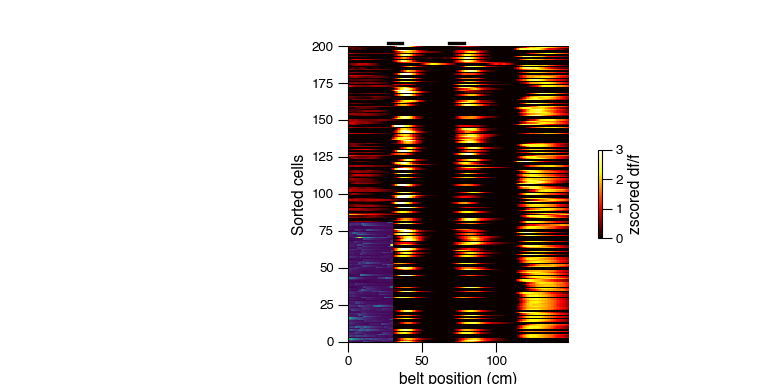

<IPython.core.display.Javascript object>


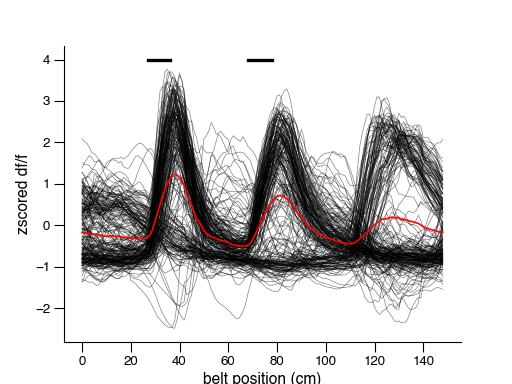

<IPython.core.display.Javascript object>


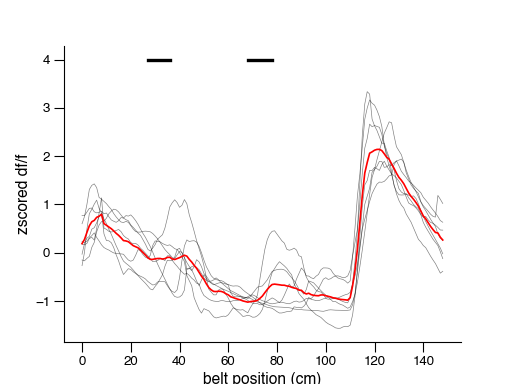

<IPython.core.display.Javascript object>


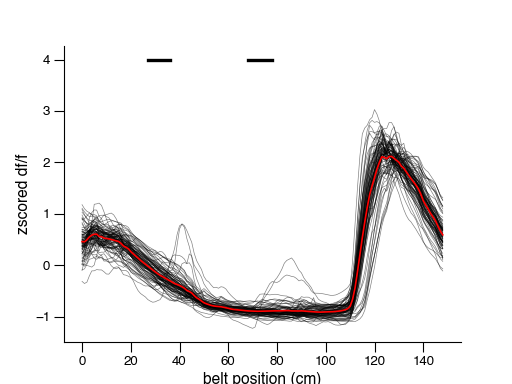

Text(0.5, 0, 'belt position (cm)')

In [150]:
cuemaps = np.stack(df.df_f_map)
mcuemaps = cuemaps.mean(axis = 1)
zmcuemaps = ((mcuemaps.T - mcuemaps[:,:].mean(axis = 1))/mcuemaps[:,:].std(axis = 1)).T
tmp = mcuemaps[df.position_ev.argsort()]
posidx = np.where((df.is_position==1) & (df.is_puff == 0))[0]
puffidx = np.where((df.is_position==0) & (df.is_puff == 1))[0]
bothidx = np.where((df.is_position==1) & (df.is_puff == 1))[0]
noneidx = np.where((df.is_position==0) & (df.is_puff == 0))[0]
idx = np.concatenate([posidx,bothidx,puffidx,noneidx],axis = 0)
plt.figure()
plt.imshow(zmcuemaps[df.position_ev.argsort()[::-1]],aspect = 'auto',clim = [0,3],cmap = 'hot')
for c in df.belt_cues[0]:
    plt.plot(c,[202,202],'k',lw = 3,clip_on=False)
plt.xlabel('belt position (cm)')
plt.ylabel('Sorted cells')
plt.colorbar(label = 'zscored df/f',shrink=0.3)
plt.ylim([0,200])
plt.figure()
plt.plot(zmcuemaps[posidx].T,'k',lw = 0.6,alpha = 0.5);
plt.plot(zmcuemaps[posidx].mean(axis = 0),'r');
for c in df.belt_cues[0]:
    plt.plot(c,[4,4],'k',lw = 3,clip_on=False)
plt.ylabel('zscored df/f')
plt.xlabel('belt position (cm)')

plt.figure()
plt.plot(zmcuemaps[puffidx].T,'k',lw = 0.6,alpha = 0.5);
plt.plot(zmcuemaps[puffidx].mean(axis = 0),'r');
for c in df.belt_cues[0]:
    plt.plot(c,[4,4],'k',lw = 3,clip_on=False)
plt.ylabel('zscored df/f')
plt.xlabel('belt position (cm)')


plt.figure()
plt.plot(zmcuemaps[bothidx].T,'k',lw = 0.6,alpha = 0.5);
plt.plot(zmcuemaps[bothidx].mean(axis = 0),'r');
for c in df.belt_cues[0]:
    plt.plot(c,[4,4],'k',lw = 3,clip_on=False)
plt.ylabel('zscored df/f')
plt.xlabel('belt position (cm)')

<IPython.core.display.Javascript object>


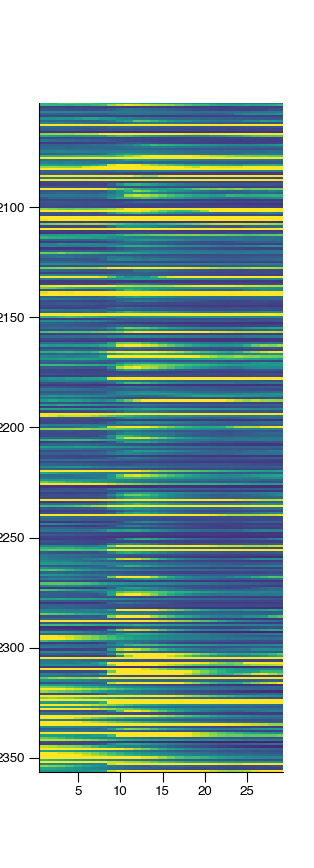

In [162]:
plt.figure()
plt.imshow(np.stack(df.cue_maps[df.position_ev.argsort()],axis = 0)[:,0,...].mean(axis = 1),
           aspect = 'auto',clim = [0,50])

<IPython.core.display.Javascript object>


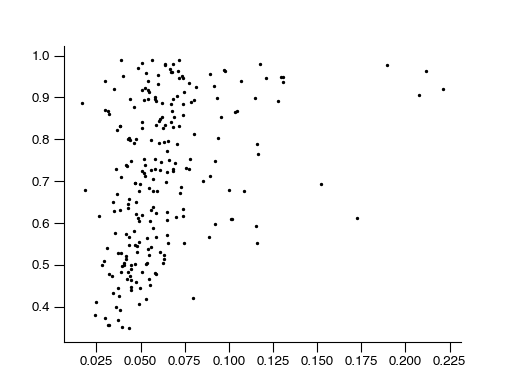

In [152]:
posidx = (df.is_position==1) & (df.is_puff == 0)
puffidx = (df.is_position==0) & (df.is_puff == 1)
bothidx = (df.is_position==1) & (df.is_puff == 1)
plt.figure()
plt.plot(df.position_reliability[posidx],df.puff_avg_trial_corr[posidx],'.',markerfacecolor = colors[0])
#plt.plot(df.cue_amplitude[puffidx],df.puff_response_amplitude[puffidx],'.',markerfacecolor = colors[1])
#plt.plot(df.cue_amplitude[bothidx],df.puff_response_amplitude[bothidx],'.',markerfacecolor = colors[2])

<IPython.core.display.Javascript object>


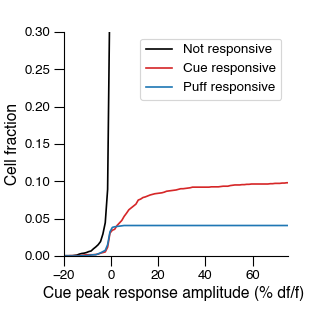

<IPython.core.display.Javascript object>


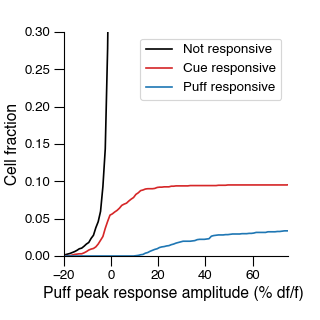

(0, 0.3)

In [130]:
edges = np.arange(-20,300,1)
bins,ed = np.histogram(df.cue_amplitude[posidx],edges)
fig = plt.figure(figsize = [4,4])
fig.add_axes([.2,.2,.7,.7])
x = ed[:-1]+np.diff(ed[:2])/2.
bins,ed = np.histogram(df.cue_amplitude[noneidx],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Not responsive')
bins,ed = np.histogram(df.cue_amplitude[posidx],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Cue responsive')
bins,ed = np.histogram(df.cue_amplitude[np.hstack([puffidx,bothidx])],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Puff responsive')
plt.legend()
plt.ylabel('Cell fraction')
plt.xlabel('Cue peak response amplitude (% df/f) ')
plt.xlim([-20,75])
plt.ylim([0,.3])

edges = np.arange(-20,300,1)
bins,ed = np.histogram(df.cue_amplitude[posidx],edges)
fig = plt.figure(figsize = [4,4])
fig.add_axes([.2,.2,.7,.7])
x = ed[:-1]+np.diff(ed[:2])/2.
bins,ed = np.histogram(df.puff_response_amplitude[noneidx],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Not responsive')




bins,ed = np.histogram(df.puff_response_amplitude[posidx],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Cue responsive')
bins,ed = np.histogram(df.puff_response_amplitude[np.hstack([puffidx,bothidx])],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Puff responsive')
plt.legend()
plt.ylabel('Cell fraction')
plt.xlabel('Puff peak response amplitude (% df/f) ')
plt.xlim([-20,75])
plt.ylim([0,.3])